# Importing Libraries

In [1]:
import pyodbc 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pivottablejs import pivot_ui
sns.set()
pd.set_option('display.max_columns', None)
pd.options.display.float_format = "{:.2f}".format

In [2]:
store = pd.read_excel("USA_AHFS_Stores.xlsx",sheet_name='2020')

In [3]:
store.head()

,StoreID,Written,Gross Written,Written Cost,Written GM $,Written GM %,REAC %,Traffic,Tickets,Average Ticket,Close Rate%,SPG,Rest Test,Finance Count,Finance Amount,Finance%,TotalSquareFeet,PSF,EmployeeHours
0,1,7808483.29,9093142.30,3865758.09,3942725.20,0.50,0.14,27409.50,4384.40,1780.97,0.16,284.88,0,2692,5272662.56,0.68,38150,204.68,18435.83
1,2,6239791.17,7462474.29,3149869.12,3089922.05,0.50,0.16,21877.00,4175.55,1494.36,0.19,285.22,0,2542,4144643.35,0.66,49093,127.10,20012.98
2,3,10896043.48,12268309.14,5205453.39,5690590.09,0.52,0.11,34380.50,5821.21,1871.78,0.17,316.93,0,3606,7794689.25,0.72,42554,256.05,25502.82
3,4,8084362.11,9147033.33,3872488.73,4211873.38,0.52,0.12,19645.00,4047.62,1997.31,0.21,411.52,0,2547,5849468.69,0.72,34190,236.45,16297.63
4,6,14493144.00,15696181.81,6895775.76,7597368.24,0.52,0.08,35770.50,7539.98,1922.17,0.21,405.17,0,4030,9325315.71,0.64,37983,381.57,29279.02


In [4]:
# Stripping out spaces from ends of names, and replacing internal spaces with "_"
#print("\nStripping spaces from ends of column names; replacing internal spaces with '_'\n")
store.columns = [col.strip().replace(' ', '_').lower() for col in store.columns]
store.columns = [col.strip().replace('-', '_').lower() for col in store.columns]
store.columns = [col.strip().replace('/', '_').lower() for col in store.columns]

In [5]:
store.head()

,storeid,written,gross_written,written_cost,written_gm_$,written_gm_%,reac_%,traffic,tickets,average_ticket,close_rate%,spg,rest_test,finance_count,finance_amount,finance%,totalsquarefeet,psf,employeehours
0,1,7808483.29,9093142.30,3865758.09,3942725.20,0.50,0.14,27409.50,4384.40,1780.97,0.16,284.88,0,2692,5272662.56,0.68,38150,204.68,18435.83
1,2,6239791.17,7462474.29,3149869.12,3089922.05,0.50,0.16,21877.00,4175.55,1494.36,0.19,285.22,0,2542,4144643.35,0.66,49093,127.10,20012.98
2,3,10896043.48,12268309.14,5205453.39,5690590.09,0.52,0.11,34380.50,5821.21,1871.78,0.17,316.93,0,3606,7794689.25,0.72,42554,256.05,25502.82
3,4,8084362.11,9147033.33,3872488.73,4211873.38,0.52,0.12,19645.00,4047.62,1997.31,0.21,411.52,0,2547,5849468.69,0.72,34190,236.45,16297.63
4,6,14493144.00,15696181.81,6895775.76,7597368.24,0.52,0.08,35770.50,7539.98,1922.17,0.21,405.17,0,4030,9325315.71,0.64,37983,381.57,29279.02


In [6]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   storeid          85 non-null     int64  
 1   written          85 non-null     float64
 2   gross_written    85 non-null     float64
 3   written_cost     85 non-null     float64
 4   written_gm_$     85 non-null     float64
 5   written_gm_%     85 non-null     float64
 6   reac_%           85 non-null     float64
 7   traffic          85 non-null     float64
 8   tickets          85 non-null     float64
 9   average_ticket   85 non-null     float64
 10  close_rate%      85 non-null     float64
 11  spg              85 non-null     float64
 12  rest_test        85 non-null     int64  
 13  finance_count    85 non-null     int64  
 14  finance_amount   85 non-null     float64
 15  finance%         85 non-null     float64
 16  totalsquarefeet  85 non-null     int64  
 17  psf              8

In [7]:
store.describe().T

,count,mean,std,min,25%,50%,75%,max
storeid,85.00,84.08,99.19,1.00,23.00,48.00,72.00,544.00
written,85.00,7404546.99,4177349.32,1539035.91,4389195.10,6463298.98,9658595.60,25909925.09
gross_written,85.00,8430342.98,4688912.53,1817993.54,5187908.33,7462474.29,10824731.32,29504998.21
written_cost,85.00,3602237.39,1992696.53,778637.13,2175979.06,3149869.12,4795599.21,12369936.94
written_gm_$,85.00,3802309.60,2190813.00,760398.78,2316718.10,3295900.53,4848399.12,13539988.15
written_gm_%,85.00,0.51,0.02,0.36,0.50,0.51,0.52,0.54
reac_%,85.00,0.13,0.03,0.07,0.10,0.12,0.14,0.23
traffic,85.00,24050.87,9802.41,7798.50,15775.50,22130.50,30898.50,56299.50
tickets,85.00,4222.93,2028.74,1010.93,2770.80,3872.65,5241.24,12254.42
average_ticket,85.00,1706.96,218.12,899.02,1579.22,1678.26,1874.32,2114.33


In [8]:
store.shape

(85, 19)

In [9]:
store.isnull().sum().sort_values(ascending = False)

storeid            0
close_rate%        0
psf                0
totalsquarefeet    0
finance%           0
finance_amount     0
finance_count      0
rest_test          0
spg                0
average_ticket     0
written            0
tickets            0
traffic            0
reac_%             0
written_gm_%       0
written_gm_$       0
written_cost       0
gross_written      0
employeehours      0
dtype: int64

In [10]:
pivot_ui(store)

In [11]:
store.drop(['storeid','rest_test'], axis=1, inplace=True)

C:\Users\MOsman\AppData\Roaming\Python\Python38\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


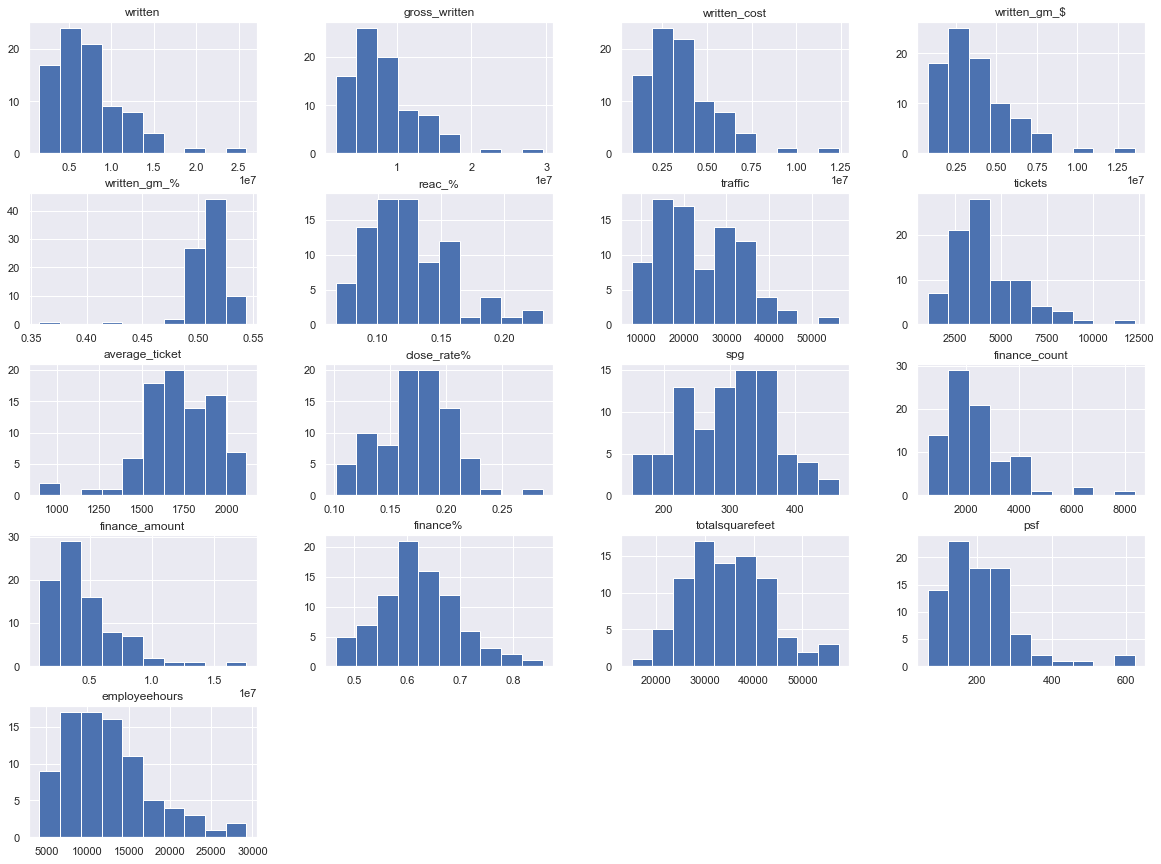

In [12]:
# Visualization of numerical data distribution
store.hist(bins=10, figsize=(20,15))
plt.show()

In [13]:
store.drop(['finance_amount','gross_written','written_cost','written_gm_%','written_gm_$','reac_%'], axis=1, inplace=True)

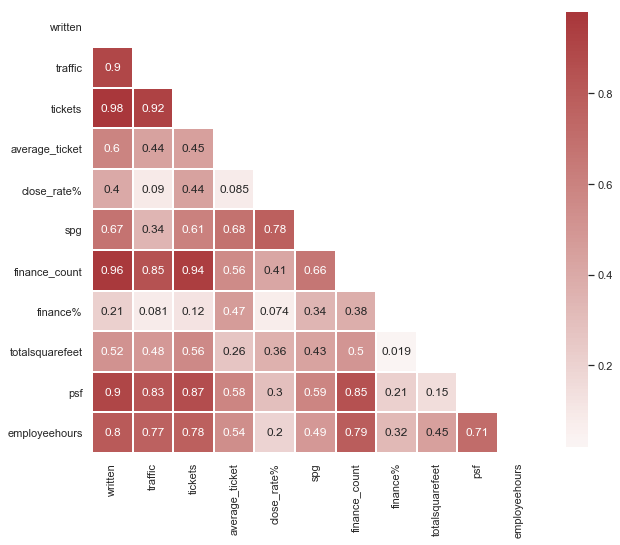

In [14]:
corr = store.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10, 10))
    ax = sns.heatmap(corr, mask=mask,  cmap = 'vlag', center = 0, square = True, annot = True, linewidths = .1, cbar_kws = {"shrink": .8})